<a href="https://colab.research.google.com/github/abhaysrivastav/Pytorch/blob/master/MNIST_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch torchvision


In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5,), (0.5,))
                                ])
training_dataset = datasets.MNIST(root = '/data', train=True, download=True, transform = transform ) 
validation_dataset = datasets.MNIST(root = '/data', train=False, download=True, transform = transform ) 

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size = 100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size = 100, shuffle=False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image* np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

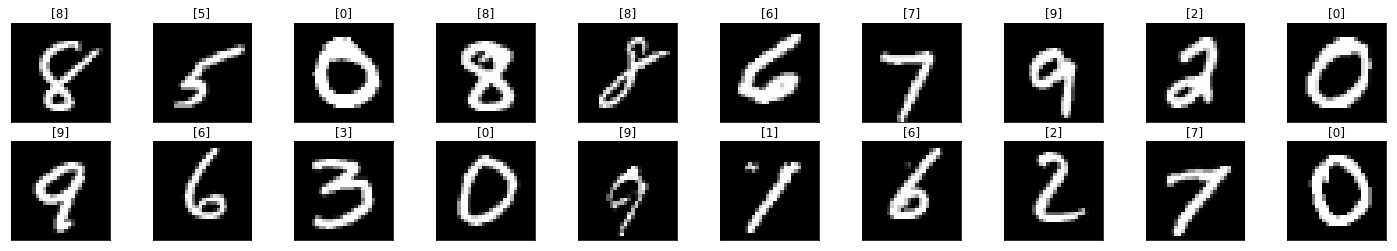

In [0]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1,  xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])
  
  

In [0]:
class Classifier(nn.Module):
  def __init__(self, D_in, H1, H2, D_out):
    super().__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, D_out)
  
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x



In [0]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.0001)

In [0]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_loss_correct = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_correct = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    with torch.no_grad():
      for val_inputs , val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        _, val_preds = torch.max(val_outputs, 1)    
        val_running_loss += val_loss.item()
        val_running_correct += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_correct.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)           
    val_running_loss_correct.append(val_epoch_acc)                                      
    print('epoch : ', (e+1))
    print('training loss: {:.4f}, acc{:.4f}'.format(epoch_loss, epoch_acc.item()) )
    print('Validation loss: {:.4f}, Validation acc{:.4f}'.format(val_epoch_loss, val_epoch_acc.item()) )

print('Training Done!')

epoch :  1
training loss: 0.9226, acc79.0367
Validation loss: 0.4078, Validation acc89.2600
epoch :  2
training loss: 0.3686, acc89.6400
Validation loss: 0.3174, Validation acc90.8000
epoch :  3
training loss: 0.3121, acc91.0400
Validation loss: 0.2847, Validation acc92.2500
epoch :  4
training loss: 0.2811, acc91.8967
Validation loss: 0.2607, Validation acc92.4100
epoch :  5
training loss: 0.2574, acc92.6050
Validation loss: 0.2392, Validation acc93.2000
epoch :  6
training loss: 0.2362, acc93.2317
Validation loss: 0.2215, Validation acc93.4900
epoch :  7
training loss: 0.2179, acc93.7650
Validation loss: 0.2098, Validation acc93.7800
epoch :  8
training loss: 0.2016, acc94.2133
Validation loss: 0.1940, Validation acc94.3400
epoch :  9
training loss: 0.1877, acc94.6700
Validation loss: 0.1780, Validation acc94.6800
epoch :  10
training loss: 0.1745, acc95.0083
Validation loss: 0.1704, Validation acc94.7500
epoch :  11
training loss: 0.1637, acc95.2583
Validation loss: 0.1601, Validati

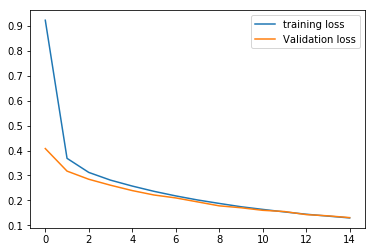

In [0]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(val_running_loss_history, label = 'Validation loss')
plt.legend()

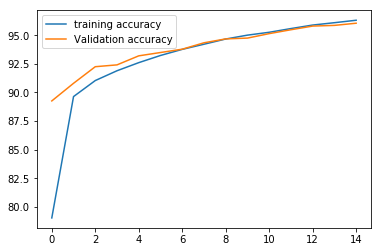

In [0]:
plt.plot(running_corrects_history, label = 'training accuracy')
plt.plot(val_running_loss_correct, label = 'Validation accuracy')
plt.legend()

Validation accuracy becoming lower so the solution is regularization

In [0]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

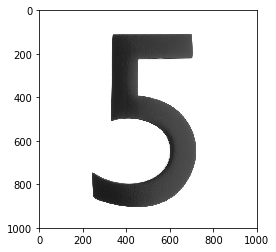

In [0]:
import requests
from PIL import *
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


In [0]:
import PIL.ImageOps

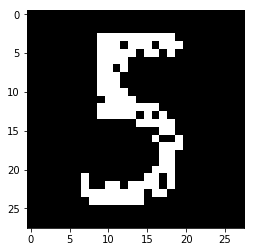

In [0]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img  = transform(img)
plt.imshow(im_convert(img))

In [0]:
img = img.view(img.shape[0], -1)
outputs = model(img)
_, pred = torch.max(outputs, 1)    
print(pred.item())

5
